# Inspección de datos


## Descripción del dataset


## Descripción de columnas del dataset



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('advertising.csv', low_memory=False)

## Cantidad de registros
El archivo contiene 200 filas y 4 columnas

In [2]:
print(f'Cantidad de filas: {df.shape[0]} - Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 200 - Cantidad de columnas: 4


In [3]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Nombres de columnas
Se puede observar que los nombres de las columnas no tienen espacios en blanco ni carácteres especiales.

In [32]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


## Tipos de datos


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


## Valores nulos
Se visualiza que los campos no contienen valores nulos.

In [34]:
null_counts = df.isnull().sum()
print(null_counts)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## Valores duplicados
En el dataset no existen registros duplicados.

In [35]:

duplicated_rows = df.duplicated()
duplicated_rows = duplicated_rows[duplicated_rows]
duplicated_rows

Series([], dtype: bool)

## Rangos de valores

In [36]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [37]:

means = {
    "TV": df["TV"].mean(),
    "Radio": df["Radio"].mean(),
    "Newspaper": df["Newspaper"].mean(),
    "Sales": df["Sales"].mean()
}

means_df = pd.DataFrame(list(means.items()), columns=["Variable", "Mean"])

means_df["Mean"] = means_df["Mean"].round(2)

print(means_df)


    Variable    Mean
0         TV  147.04
1      Radio   23.26
2  Newspaper   30.55
3      Sales   15.13


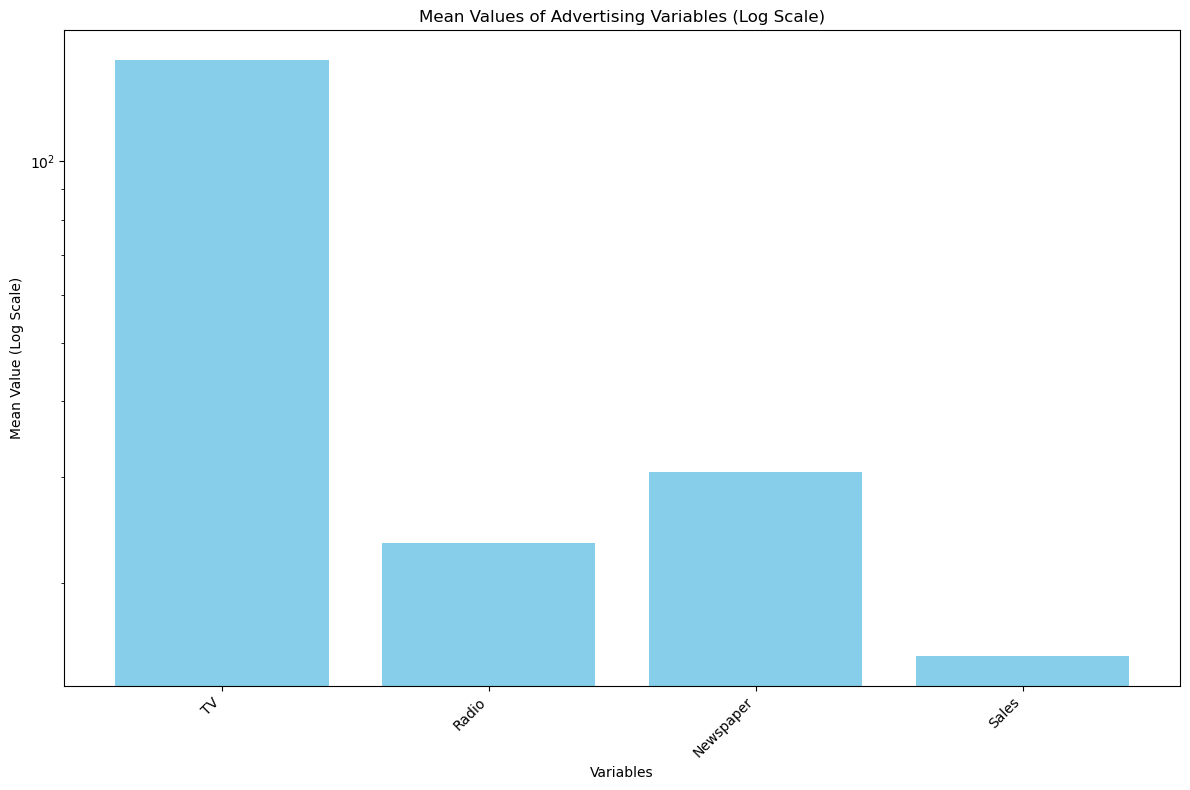

In [40]:

import matplotlib.pyplot as plt

means = {
    "TV": df["TV"].mean(),
    "Radio": df["Radio"].mean(),
    "Newspaper": df["Newspaper"].mean(),
    "Sales": df["Sales"].mean()
}
plt.figure(figsize=(12, 8))
plt.bar(means.keys(), means.values(), color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Mean Value (Log Scale)')
plt.yscale('log')  # Aplica escala logarítmica al eje y
plt.title('Mean Values of Advertising Variables (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


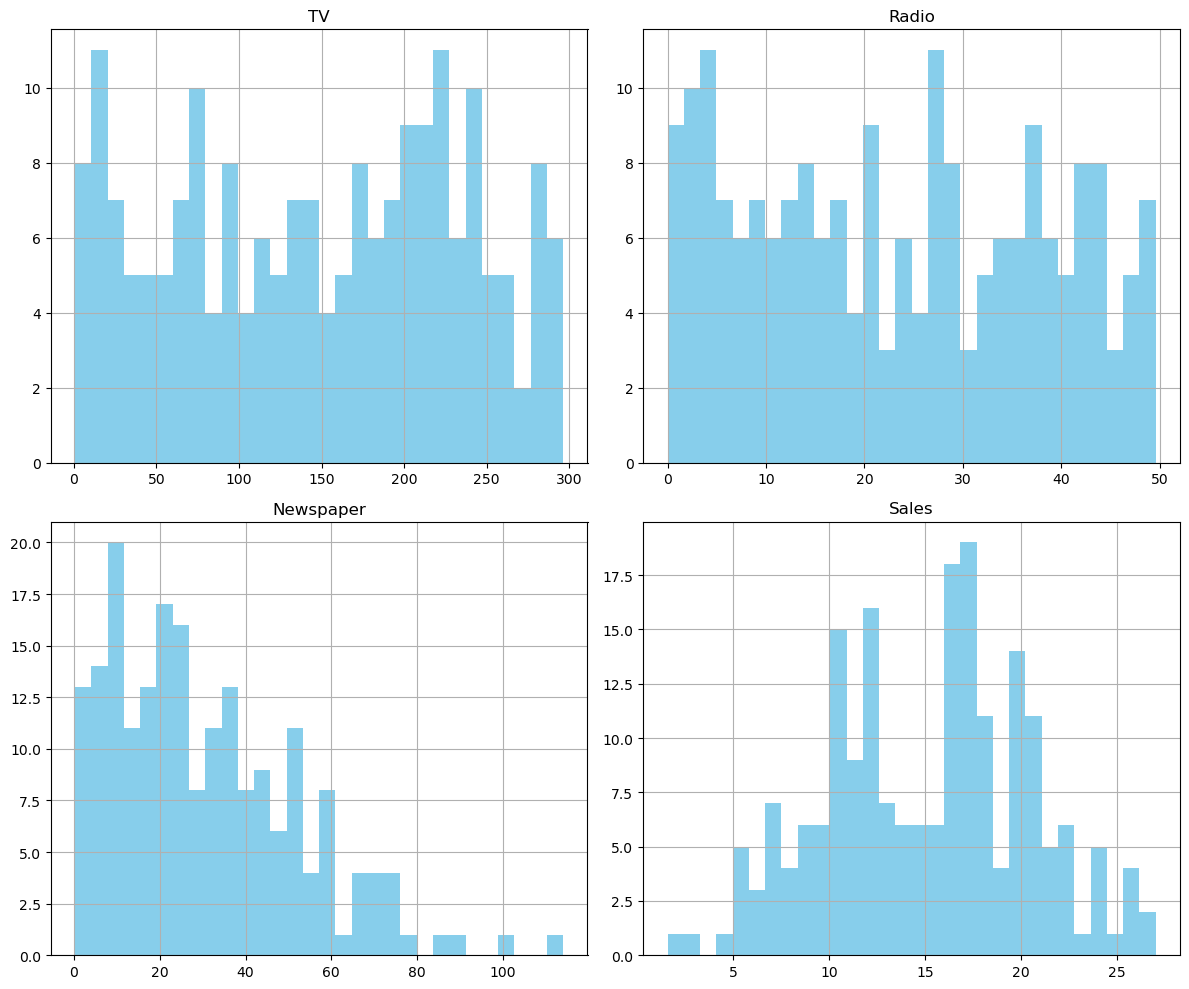

In [41]:
df.hist(figsize=(12, 10), bins=30, color='skyblue')
plt.tight_layout()
plt.show()


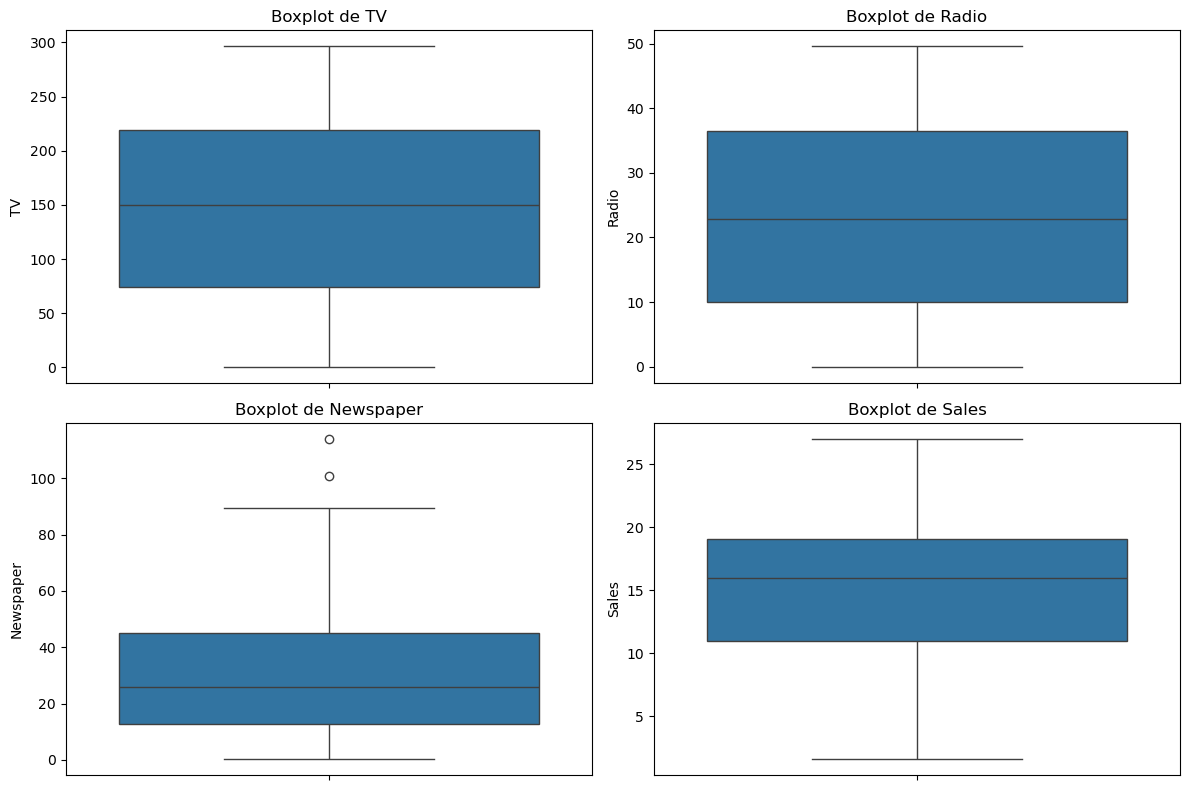

In [43]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['TV'])
plt.title('Boxplot de TV')
plt.ylabel('TV')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Radio'])
plt.title('Boxplot de Radio')
plt.ylabel('Radio')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Newspaper'])
plt.title('Boxplot de Newspaper')
plt.ylabel('Newspaper')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Sales'])
plt.title('Boxplot de Sales')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

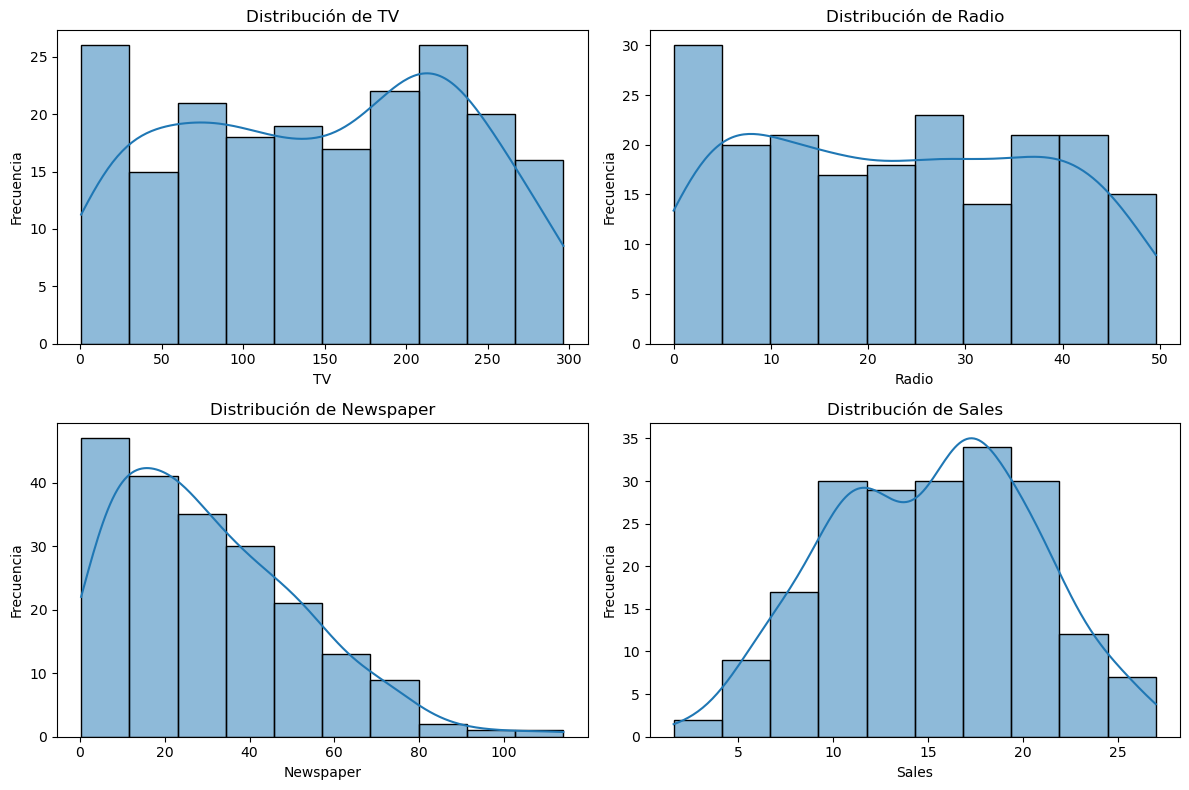

In [44]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['TV'], bins=10, kde=True)
plt.title('Distribución de TV')
plt.xlabel('TV')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.histplot(df['Radio'], bins=10, kde=True)
plt.title('Distribución de Radio')
plt.xlabel('Radio')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(df['Newspaper'], bins=10, kde=True)
plt.title('Distribución de Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title('Distribución de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

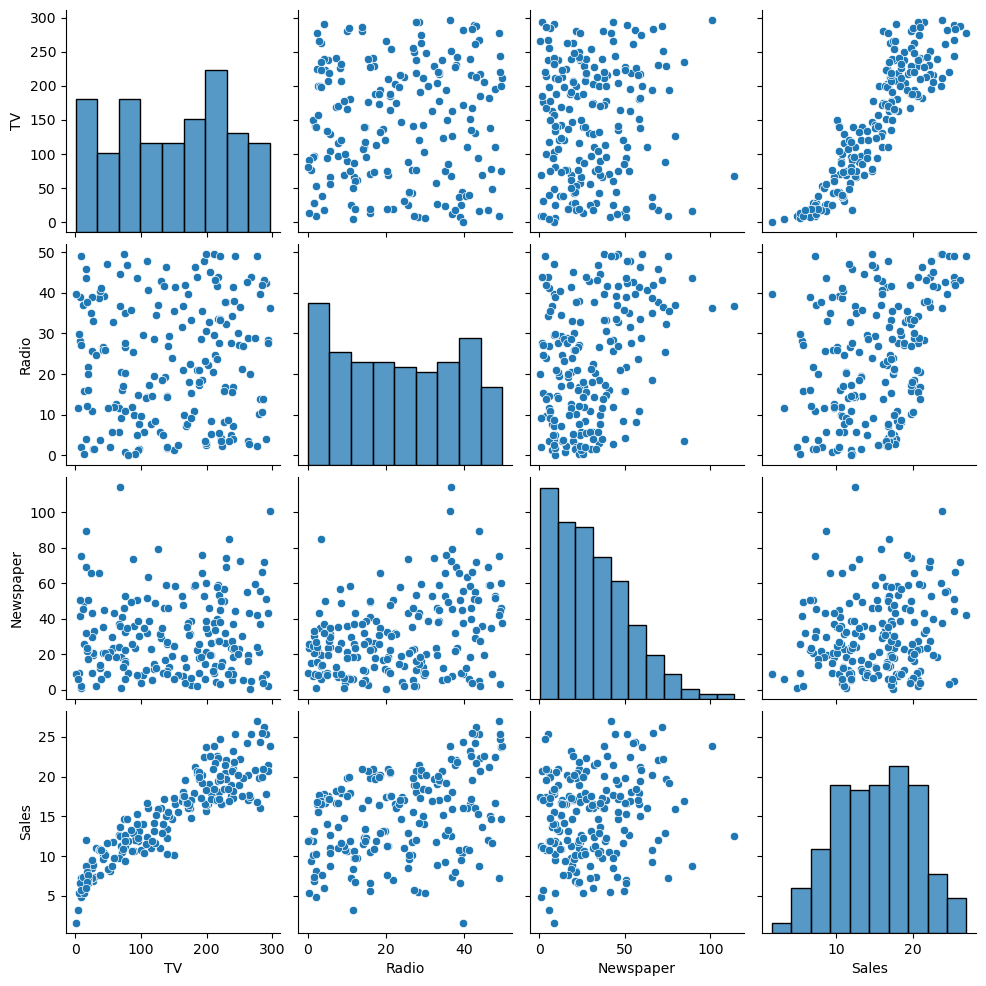

In [45]:
sns.pairplot(df)
plt.show()

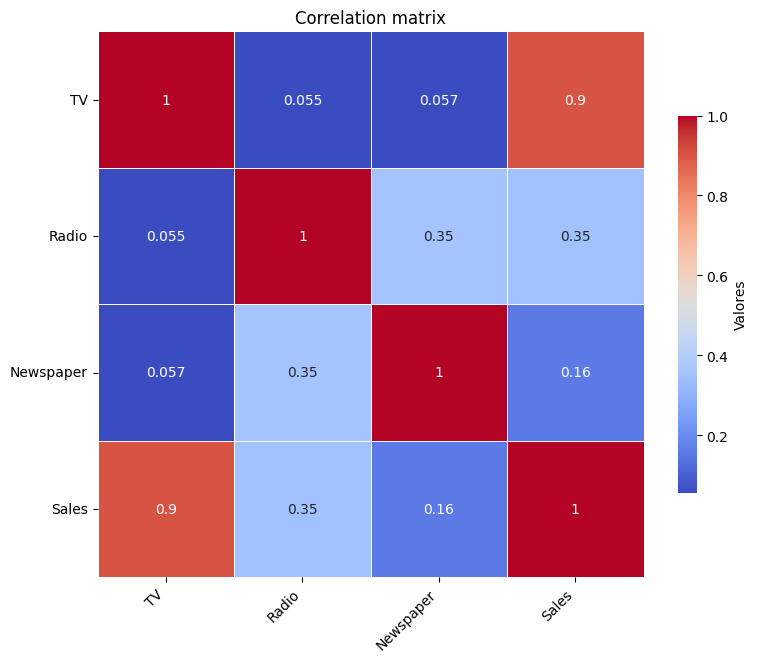

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))  

sns.heatmap(
    correlation_matrix, 
    cmap="coolwarm",  
    annot=True,  
    square=True,  
    linewidths=.5, 
    cbar_kws={"shrink": .5, "label": "Valores"}, 
    xticklabels=correlation_matrix.columns, 
    yticklabels=correlation_matrix.columns
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Correlation matrix", fontsize=12)

plt.tight_layout()  

plt.show()